In [1]:
#Zomato Data Analysis Project
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df= pd.read_csv('C:/Users/acer/Downloads/zomato.csv')
df= pd.DataFrame(df)
df.sample()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
24615,https://www.zomato.com/bangalore/baskin-robbin...,"401, Near Jal Vayu Vihar, 5th A Main, 2nd Bloc...",Baskin Robbins,No,No,3.6/5,27,080 40903598,Kalyan Nagar,Dessert Parlor,NaN,"Ice Cream, Desserts",250,"[('Rated 3.0', 'RATED\n This franchise branch...",[],Desserts,Kalyan Nagar


In [3]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [12]:
# Drop the useless data
df.drop(['url', 'dish_liked', 'phone', 'address'], axis=1, inplace=True)

In [13]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [15]:
def convert_rate(value):
    # Check if the value is "NEW" or "-"
    if value == 'NEW' or value == '-':
        return np.nan  # Return "Not a Number" instead of crashing
    else:
        # Your original logic works fine for normal numbers
        value = str(value).split('/')
        value = value[0]
        return float(value)

# Now apply it
df['rate'] = df['rate'].apply(convert_rate)
print(df.head())

                    name online_order book_table  rate  votes      location  \
0                  Jalsa          Yes        Yes   4.1    775  Banashankari   
1         Spice Elephant          Yes         No   4.1    787  Banashankari   
2        San Churro Cafe          Yes         No   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7     88  Banashankari   
4          Grand Village           No         No   3.8    166  Basavanagudi   

             rest_type                        cuisines  \
0        Casual Dining  North Indian, Mughlai, Chinese   
1        Casual Dining     Chinese, North Indian, Thai   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   
3          Quick Bites      South Indian, North Indian   
4        Casual Dining        North Indian, Rajasthani   

  approx_cost(for two people)  \
0                         800   
1                         800   
2                         800   
3                         300   
4          

The count  of the top resturant types are:  ,rest_type
Quick Bites           19132
Casual Dining         10330
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           867
Bar                     697
Name: count, dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_3992\2450115081.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=a.values, y=a.index, palette='viridis')


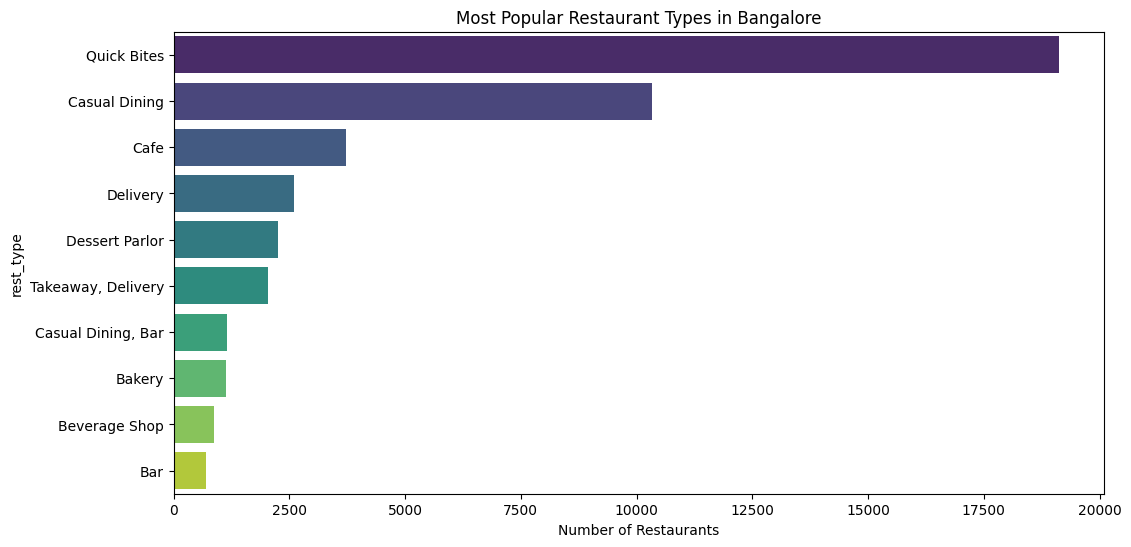

In [16]:
#What type of resturant do the majority of customers order from?\

# 1. Count how many restaurants exist for each type
a=df['rest_type'].value_counts().head(10)
print(f'The count  of the top resturant types are:  ,{a}')

# 2. Visualize it (Great for your Project/Resume)
plt.figure(figsize=(12, 6))
sns.barplot(x=a.values, y=a.index, palette='viridis')
plt.title("Most Popular Restaurant Types in Bangalore")
plt.xlabel("Number of Restaurants")
plt.show()


The count  of the top resturant types are:  ,rest_type
Casual Dining          4549477
Quick Bites            1477467
Cafe                   1454783
Casual Dining, Bar     1225408
Casual Dining, Cafe     528752
Bar, Casual Dining      454532
Lounge                  407889
Pub                     405025
Pub, Microbrewery       350648
Cafe, Casual Dining     337753
Name: votes, dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_3992\1444357451.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=b.values, y=b.index, palette='viridis')


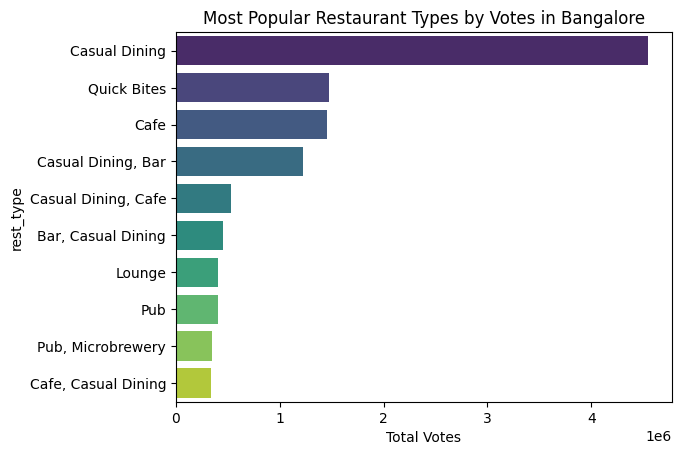

In [17]:
# Group by type and sum the 'votes' to see where customers actually go
b=df.groupby('rest_type')['votes'].sum().sort_values(ascending=False).head(10)
print(f'The count  of the top resturant types are:  ,{b}')
# Visualize it
sns.barplot(x=b.values, y=b.index, palette='viridis')
plt.title("Most Popular Restaurant Types by Votes in Bangalore")
plt.xlabel("Total Votes")
plt.show()




In [18]:
#conclusion
#Majority of customers order from "Casual Dining" restaurant types, as they have the highest number of votes.

The count  of the top resturant types are:  ,rest_type
Casual Dining          4549477
Quick Bites            1477467
Cafe                   1454783
Casual Dining, Bar     1225408
Casual Dining, Cafe     528752
Bar, Casual Dining      454532
Lounge                  407889
Pub                     405025
Pub, Microbrewery       350648
Cafe, Casual Dining     337753
Name: votes, dtype: int64


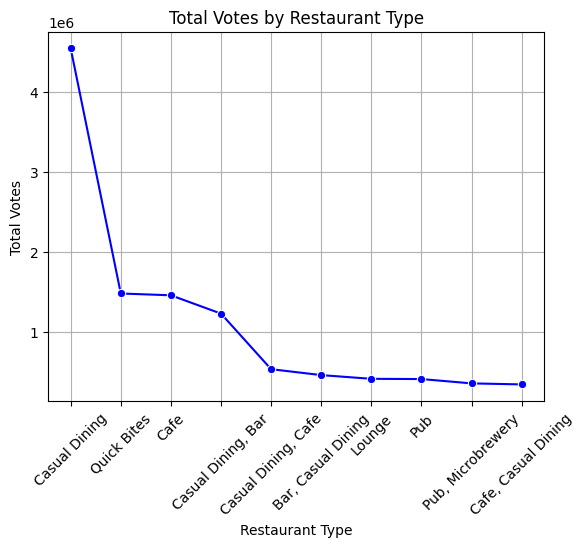

In [19]:
#2. How many votes has each type of restaurant received?
e=df.groupby('rest_type')['votes'].sum().sort_values(ascending=False).head(10)
print(f'The count  of the top resturant types are:  ,{e}') 
sns.lineplot(x=e.index, y=e.values, marker='o', color='blue')
plt.title("Total Votes by Restaurant Type")
plt.xlabel("Restaurant Type")
plt.ylabel("Total Votes")
plt.xticks(rotation=45)
plt.grid()
plt.show()


    

In [21]:
#What is the average cost for two people in each restaurant type?
# 1. Remove the commas "," from the cost column
# We act on the string (.str) to replace ',' with nothing ''
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')

# 2. Convert the column to numbers
# errors='coerce' turns any bad data (like text) into NaN so it doesn't crash
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# 3. NOW run your analysis code (it will work now!)
f = df.groupby('rest_type')['approx_cost(for two people)'].mean().sort_values(ascending=False).head(10)

print("Top 10 Expensive Restaurant Types (Average Cost):")
print(f)

Top 10 Expensive Restaurant Types (Average Cost):
rest_type
Fine Dining, Bar             3002.500000
Fine Dining, Lounge          3000.000000
Fine Dining, Microbrewery    3000.000000
Fine Dining                  2707.514451
Bar, Lounge                  2450.000000
Club, Casual Dining          2400.000000
Club                         2145.945946
Lounge, Bar                  2027.777778
Lounge, Microbrewery         2000.000000
Bar, Quick Bites             2000.000000
Name: approx_cost(for two people), dtype: float64


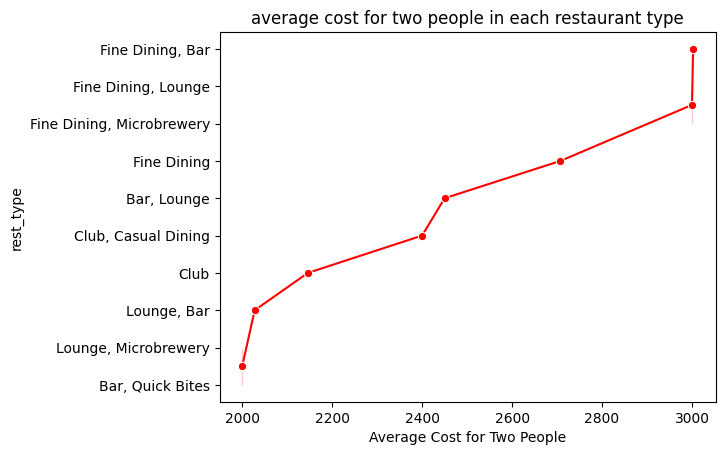

In [22]:
sns.lineplot(x=f.values, y=f.index, marker='o', color='red')
plt.title("average cost for two people in each restaurant type")
plt.xlabel("Average Cost for Two People")
plt.show()

In [23]:
#conclusion
#The "Fine Dining" restaurant type has the highest average cost for two people, indicating that it is the most expensive type of restaurant among the top 10 analyzed.

The average ratings for each restaurant type are: rest_type
Pub, Cafe                      4.657500
Bar, Pub                       4.600000
Microbrewery                   4.478571
Pub, Microbrewery              4.452632
Microbrewery, Bar              4.446154
Microbrewery, Pub              4.438095
Casual Dining, Irani Cafee     4.406667
Cafe, Lounge                   4.400000
Fine Dining, Lounge            4.400000
Microbrewery, Casual Dining    4.369421
Name: rate, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_3992\2131052197.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=e.values, y=e.index, marker='o', palette='viridis')


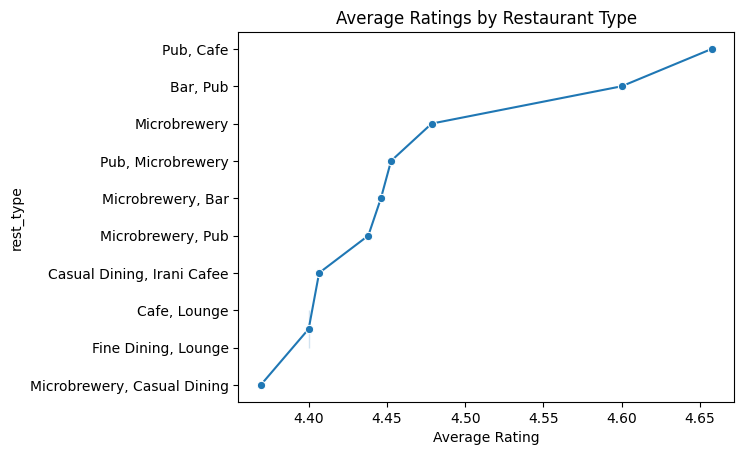

In [24]:
#3. What are the ratings that each restaurant type has received?
e=df.groupby('rest_type')['rate'].mean().sort_values(ascending=False).head(10)
print(f'The average ratings for each restaurant type are: {e}')
#visualize it
sns.lineplot(x=e.values, y=e.index, marker='o', palette='viridis')
plt.title("Average Ratings by Restaurant Type")
plt.xlabel("Average Rating")
plt.show()

The average spending for each restaurant type is: rest_type
Fine Dining, Bar             3002.500000
Fine Dining, Lounge          3000.000000
Fine Dining, Microbrewery    3000.000000
Fine Dining                  2707.514451
Bar, Lounge                  2450.000000
Club, Casual Dining          2400.000000
Club                         2145.945946
Lounge, Bar                  2027.777778
Lounge, Microbrewery         2000.000000
Bar, Quick Bites             2000.000000
Name: approx_cost(for two people), dtype: float64


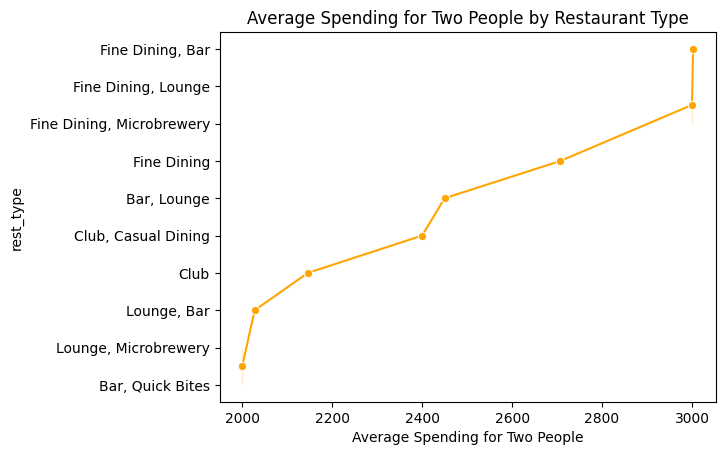

In [25]:
#4. Zomato has observed that most couples order their food online. What is the average spending on each other?
g=df.groupby('rest_type')['approx_cost(for two people)'].mean().sort_values(ascending=False).head(10)
print(f'The average spending for each restaurant type is: {g}')
sns.lineplot(x=g.values, y=g.index, marker='o', color='orange')
plt.title("Average Spending for Two People by Restaurant Type")
plt.xlabel("Average Spending for Two People")
plt.show()


The average ratings for online and offline orders are: online_order
Yes    3.72244
No     3.65907
Name: rate, dtype: float64


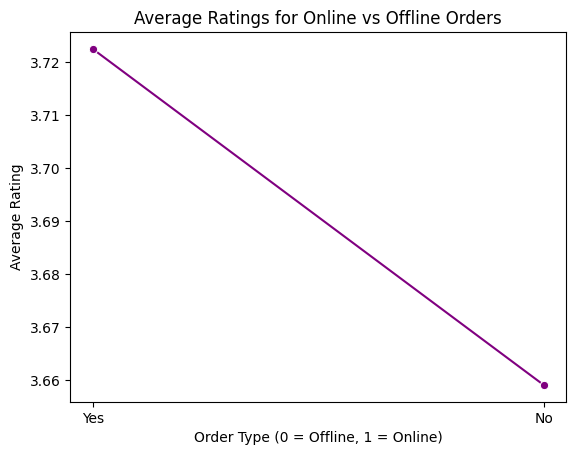

In [26]:
#5. Which mode online or offline hss recieved the maximum ratings?
h=df.groupby('online_order')['rate'].mean().sort_values(ascending=False)
print(f'The average ratings for online and offline orders are: {h}')
sns.lineplot(x=h.index, y=h.values, marker='o', color='purple')
plt.title("Average Ratings for Online vs Offline Orders")
plt.xlabel("Order Type (0 = Offline, 1 = Online)")
plt.ylabel("Average Rating")
plt.show()

In [27]:
#conclusion
#THE ONLINE MODE HAS RECEIVED HIGHER AVERAGE RATINGS COMPARED TO THE OFFLINE MODE, SUGGESTING THAT CUSTOMERS MAY BE MORE SATISFIED WITH THEIR ONLINE ORDERS.

The average cost for two people in each location is: location
Sankey Road         2505.555556
Race Course Road    1309.352518
Lavelle Road        1307.934990
MG Road             1155.704698
Infantry Road       1062.251656
Residency Road       966.320475
Langford Town        883.333333
St. Marks Road       871.306818
Cunningham Road      864.969450
Church Street        834.885764
Name: approx_cost(for two people), dtype: float64


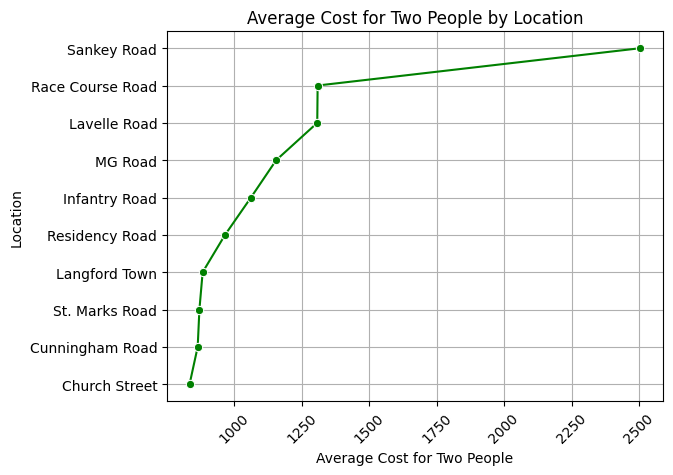

In [28]:
#6. Which location has the most expensive restaurants on average?
i=df.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False).head(10)
print(f'The average cost for two people in each location is: {i}')
sns.lineplot(x=i.values, y=i.index, marker='o', color='green')
plt.title("Average Cost for Two People by Location")
plt.xlabel("Average Cost for Two People")
plt.ylabel("Location")
plt.xticks(rotation=45)
plt.grid()
plt.show()
